In [1]:
from pycocotools.coco import COCO
import os

# COCOデータセットのパスとアノテーションファイルのパスを設定する
data_dir = '/home/yishido/DATA/coco'
annotation_file = os.path.join(data_dir, 'annotations/instances_train2017.json')

# COCOデータセットを読み込む
coco = COCO(annotation_file)

# カテゴリIDとクラス名の対応を作成する
categories = coco.loadCats(coco.getCatIds())
category_id_to_name = {category['id']: category['name'] for category in categories}

loading annotations into memory...
Done (t=5.61s)
creating index...
index created!


In [2]:
B = []

# 抽出するラベルを指定する
target_label = 'dog'

# 画像IDと画像ファイル名の対応を作成する
image_id_to_file = {}
for image in coco.dataset['images']:
    image_id_to_file[image['id']] = image['file_name']

# アノテーション情報を取得し、指定したラベルの画像とラベル、領域のペアを列挙する
for annotation in coco.dataset['annotations']:
    image_id = annotation['image_id']
    label = category_id_to_name[annotation['category_id']]
    if label == target_label:
        image_file = image_id_to_file[image_id]
        B.append(image_file)
        bbox = annotation['bbox']
        #print(f"Image: {image_file}, Label: {label}, Bounding Box: {bbox}")

In [3]:
C = []

# 抽出するラベルを指定する
target_label = 'person'

# 画像IDと画像ファイル名の対応を作成する
image_id_to_file = {}
for image in coco.dataset['images']:
    image_id_to_file[image['id']] = image['file_name']

# アノテーション情報を取得し、指定したラベルの画像とラベル、領域のペアを列挙する
for annotation in coco.dataset['annotations']:
    image_id = annotation['image_id']
    label = category_id_to_name[annotation['category_id']]
    if label == target_label:
        image_file = image_id_to_file[image_id]
        C.append(image_file)
        bbox = annotation['bbox']
        # print(f"Image: {image_file}, Label: {label}, Bounding Box: {bbox}")

In [4]:
BnC = list(set(B) & set(C))#BnC 両方
B_C = list(set(B) - set(C))#B-C 猫のみ
C_B = list(set(C) - set(B))#C-B 車のみ

In [5]:
len(BnC)

2049

../DATA/coco/images/train2017/000000319095.jpg


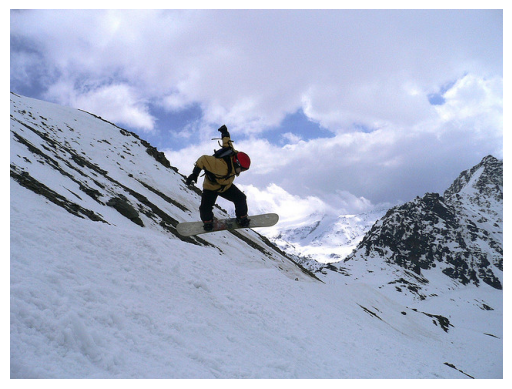

In [152]:
import matplotlib.pyplot as plt
import random
from PIL import Image

random_element2 = random.choice(C_B)
image_path2 = f"../DATA/coco/images/train2017/{random_element2}"

print(image_path2)
plt.imshow(Image.open(image_path2))
plt.axis('off')
plt.show()